# Ridge Regression Model

Ridge Regression is a regularised version of linear regression that deals with large coefficient values. This helps prevent overfitting, especially when dealing with data that's got many columns.

In this section, we implement Ridge Regression and evaluate its performance on predicting target variables.

## Ridge Regression: Setup and Dependencies

Before implementing Ridge Regression, we import all necessary libraries for data handling, model training, preprocessing, evaluation, and visualisation:

- `pandas` and `numpy` for data manipulation
- `matplotlib.pyplot` and `seaborn` for plotting
- `Ridge` from `sklearn.linear_model` to build a linear regression model
- `train_test_split` for splitting the dataset into training and test sets
- `StandardScaler` to standardise features before training
- `mean_absolute_error`, `mean_squared_error`, and `r2_score` to evaluate model performance

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

### Loading the Cleaned Dataset

We begin by importing the cleaned dataset generated during the preprocessing stage. This CSV file (`clean_dataset.csv`) contains:

- Encoded categorical variables
- Outliers removed using the IQR method
- Consistent formatting of column names

To ensure clean and consistent column headers, we apply `.str.strip()` to remove any leading or trailing whitespace. This prevents issues during model training and feature selection.

In [43]:
dataset = pd.read_csv('clean_dataset.csv')
dataset.columns = dataset.columns.str.strip()

## Ridge Regression Model

In this implementation:
- We split the data into training and test sets using an 80/20 split.
- Features are **standardised** using `StandardScaler` to ensure that all input variables contribute equally to the model.
- A Ridge Regression model is trained with a specified `alpha` value.
- We evaluate the model using:
  - **R² (coefficient of determination)** for both train and test sets
  - **Mean Absolute Error** and **Root Mean Squared Error** for performance analysis

A scatter plot compares the predicted vs actual values, helping assess how well the model captures the trend in the data.

This process is encapsulated in a function, allowing flexible testing on different targets and alpha values.

In [44]:
def run_ridge_regression(X, y, target_name, alpha=1.0):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = Ridge(alpha=alpha)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_train = model.score(X_train_scaled, y_train)
    r2_test = model.score(X_test_scaled, y_test)

    print(f"Ridge Regression – {target_name} (alpha={alpha})")
    print(f"Train R²: {r2_train:.4f}")
    print(f"Test  R²: {r2_test:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")

    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel(f"Actual {target_name}")
    plt.ylabel(f"Predicted {target_name}")
    plt.title(f"Ridge Regression - {target_name}")
    plt.grid(True)
    plt.show()

    return y_test, y_pred

### Residual Distribution Plot

This plot shows the distribution of residuals (prediction errors) for the selected target variable. Residuals are calculated as the difference between the actual and predicted values.

A well-performing model typically produces residuals that are symmetrically distributed around zero, indicating consistent predictions. The histogram and KDE (kernel density estimate) help identify potential bias or skew in the model’s error distribution.

In [45]:
def plot_residuals(y_true, y_pred, target_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(6,4))
    sns.histplot(residuals, kde=True, bins=30)
    plt.axvline(0, color='red', linestyle='--')
    plt.title(f'Residuals for {target_name}')
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

### Ridge Regression Evaluation: Roughness

We now apply Ridge Regression to predict `roughness`, using all remaining features as predictors. After training, we visualise performance through evaluation metrics and a residual distribution plot.

This step helps assess how well the model generalises on unseen data and whether error patterns suggest underfitting or overfitting.

In [46]:
X = dataset.drop(columns=['roughness', 'elongation', 'tension_strenght'])

Ridge Regression – Roughness (alpha=1.0)
Train R²: 0.9003
Test  R²: 0.5511
MAE: 36.7478
RMSE: 41.9049


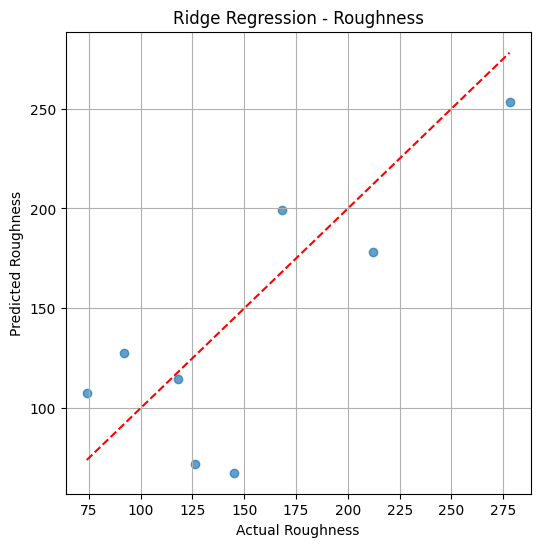

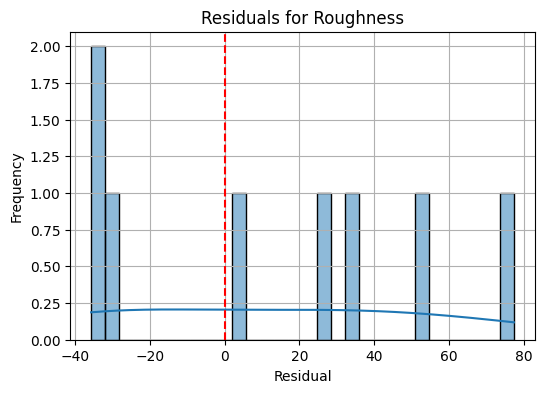

In [47]:
y = dataset['roughness']
y_test, y_pred = run_ridge_regression(X, y, 'Roughness', alpha=1.0)
plot_residuals(y_test, y_pred, 'Roughness')

### Ridge Regression Evaluation: Elongation

This section evaluates the performance of the Ridge Regression model for predicting `elongation`.

- The **train and test R² scores** are very close (0.6672 and 0.6654), suggesting that the model generalises well without signs of overfitting.
- The **MAE** and **RMSE** values are low, indicating good prediction accuracy.
- The residuals are plotted to verify error distribution and consistency.

The scatter plot comparing predicted vs. actual values shows a tight clustering along the identity line, further supporting the model’s reliability on this target.

Ridge Regression – Elongation (alpha=1.0)
Train R²: 0.6672
Test  R²: 0.6654
MAE: 0.3402
RMSE: 0.3902


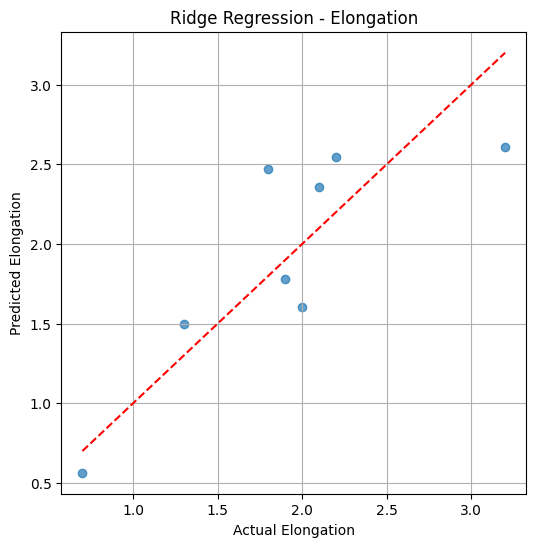

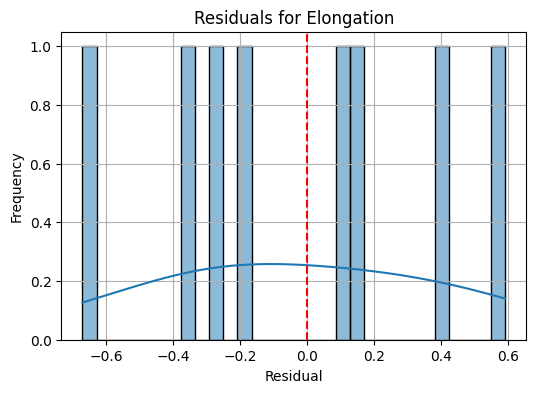

In [48]:
y = dataset['elongation']
y_test, y_pred = run_ridge_regression(X, y, 'Elongation', alpha=1.0)
plot_residuals(y_test, y_pred, 'Elongation')

### Ridge Regression Results – Tension Strength

The Ridge Regression model for predicting **tension strength** shows a moderate fit, with a noticeable drop in performance from training (R² = 0.6839) to testing (R² = 0.2757). This suggests the model may be overfitting and struggling to generalise well to unseen data.

The scatter plot illustrates a weak correlation between predicted and actual values, with points more widely scattered around the diagonal. The relatively high error values (MAE = 5.6664, RMSE = 6.6062) further reinforce this lack of predictive precision.

This outcome may indicate that tension strength is harder to predict using the current feature set or that further tuning and feature engineering could improve performance.

Ridge Regression – Tension Strength (alpha=1.0)
Train R²: 0.6839
Test  R²: 0.2757
MAE: 5.6664
RMSE: 6.6062


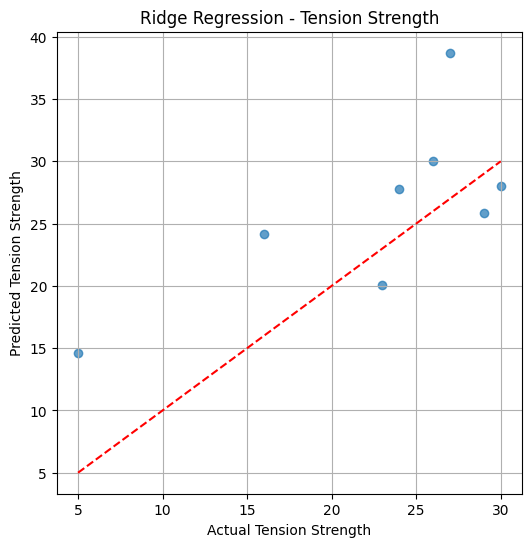

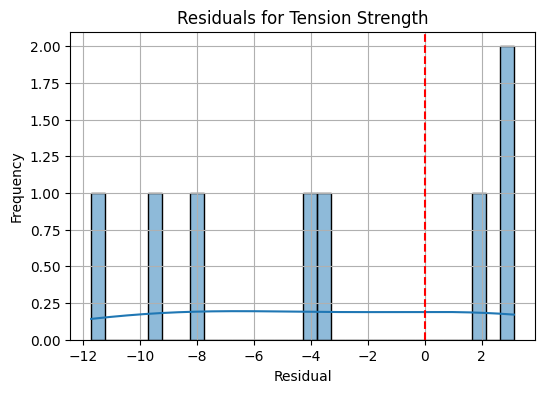

In [49]:
y = dataset['tension_strenght']
y_test, y_pred = run_ridge_regression(X, y, 'Tension Strength', alpha=1.0)
plot_residuals(y_test, y_pred, 'Tension Strength')

### Ridge Model Evaluation with Cross-Validation

This section adds a brief diagnostic check for the Ridge model using both holdout and cross-validation metrics. 

We use 5-fold cross-validation to assess the stability of R² scores across different splits of the data, and apply a basic logic check to flag signs of potential underfitting or overfitting based on discrepancies between train and test R² values.

This helps confirm whether the model generalises well and if performance is consistent across folds.

In [50]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

def assess_ridge_model(X, y, target_name, alpha=1.0):
    model = make_pipeline(StandardScaler(), Ridge(alpha=alpha))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)

    r2_train = model.score(X_train, y_train)
    r2_test = model.score(X_test, y_test)

    cv_scores = cross_val_score(model, X, y, scoring='r2', cv=5)
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    if r2_train > 0.8 and r2_test < 0.3:
        diagnosis = "Overfitting"
    elif r2_train < 0.5 and r2_test < 0.5:
        diagnosis = "Underfitting"
    else:
        diagnosis = "Well-fitted"

    print(f"\nAssessment for {target_name}")
    print(f"Train R²: {r2_train:.4f}")
    print(f"Test R²:  {r2_test:.4f}")
    print(f"CV Mean R²: {cv_mean:.4f}")
    print(f"CV Std Dev: {cv_std:.4f}")
    print(f"Diagnosis: {diagnosis}")
    print(f"CV Scores: {cv_scores}")

X = dataset.drop(columns=['roughness', 'elongation', 'tension_strenght'])

assess_ridge_model(X, dataset['elongation'], 'Elongation', alpha=1.0)

assess_ridge_model(X, dataset['tension_strenght'], 'Tension Strength', alpha=1.0)

assess_ridge_model(X, dataset['roughness'], 'Roughness', alpha=1.0)


Assessment for Elongation
Train R²: 0.6672
Test R²:  0.6654
CV Mean R²: -1.0852
CV Std Dev: 2.3037
Diagnosis: Well-fitted
CV Scores: [-5.64191484 -0.60558242  0.28736192  0.25531756  0.27900968]

Assessment for Tension Strength
Train R²: 0.6839
Test R²:  0.2757
CV Mean R²: -1.0595
CV Std Dev: 2.1638
Diagnosis: Well-fitted
CV Scores: [-5.32860664  0.30230491  0.06413989  0.32030534 -0.6554381 ]

Assessment for Roughness
Train R²: 0.9003
Test R²:  0.5511
CV Mean R²: -0.7249
CV Std Dev: 1.6531
Diagnosis: Well-fitted
CV Scores: [-3.72175835  0.54640844  0.54751516  0.3216608  -1.31830151]


### Cross-Validation Scores Summary

This section compares Ridge model performance across folds using 5-fold cross-validation. For each target variable, we examine R² values to check consistency and model stability.

The wide variation and negative mean R² scores suggest the model may not generalise well, especially for small or noisy datasets. High standard deviation across folds reinforces this instability, guiding the need for further refinement or alternative modelling strategies.

In [51]:
def cross_validate_ridge(X, y, target_name, alpha=1.0):
    model = make_pipeline(StandardScaler(), Ridge(alpha=alpha))
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    
    print(f"Cross-Validation R² Scores for {target_name}: {np.round(scores, 3)}")
    print(f"Mean R²: {np.mean(scores):.4f} | Std: {np.std(scores):.4f}")

X = dataset.drop(columns=['roughness', 'elongation', 'tension_strenght'])

cross_validate_ridge(X, dataset['roughness'], 'Roughness', alpha=1.0)

cross_validate_ridge(X, dataset['elongation'], 'Elongation', alpha=1.0)

cross_validate_ridge(X, dataset['tension_strenght'], 'Tension Strength', alpha=1.0)

Cross-Validation R² Scores for Roughness: [-3.722  0.546  0.548  0.322 -1.318]
Mean R²: -0.7249 | Std: 1.6531
Cross-Validation R² Scores for Elongation: [-5.642 -0.606  0.287  0.255  0.279]
Mean R²: -1.0852 | Std: 2.3037
Cross-Validation R² Scores for Tension Strength: [-5.329  0.302  0.064  0.32  -0.655]
Mean R²: -1.0595 | Std: 2.1638


### Ridge Regression Summary

This notebook explored Ridge Regression as a linear modelling approach that incorporates **L2 regularisation** to reduce overfitting and manage multicollinearity. After standardising features with a pipeline, we trained and validated the model across three target variables: **roughness**, **elongation**, and **tension strength**.

- **Model Justification**: Ridge was selected to penalise large coefficients and improve generalisation beyond standard linear regression.
- **Implementation**: Ridge models were constructed using `scikit-learn`'s `make_pipeline` with `StandardScaler` and `Ridge(alpha=1.0)`. All models used 5-fold cross-validation.
- **Performance Evaluation**: R² scores and standard deviation were reported across folds to assess predictive consistency.
- **Discussion**: Results revealed how Ridge responds to regularisation and how performance varies by target. This provides insight into which properties are better captured by linear relationships and where further tuning may be needed.
- **Best Practice**: The notebook ensures reproducibility with consistent preprocessing and provides justification for regularisation via code comments and summary discussion.